In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

In [4]:
num_task=5
epochs=200

def get_mean_acc(acc,epochs):
    num_task=len(acc)
    temp=np.zeros((num_task,len(acc[0])))
    for t,v in acc.items():
        temp[t,range(t * epochs, num_task * epochs)]=v
        if t<num_task-1:
            temp[t+1,:]=temp[:t+1,:].mean(0)
    return temp.mean(0)

def get_mean_acc_on_iterations(acc_list):
    acc = {}
    for i in acc_list[0].keys():
        acc[i] = np.zeros(len(acc_list[0][i]))
    for t in range(len(acc_list)):
        for i in acc_list[0].keys():
            acc[i] += np.array(acc_list[t][i]) / len(acc_list)
    return acc

## Toy Example EWC Accuracy

In [9]:
acc_ewc_list = []
acc_low_rank_ewc_list = []
acc_sketch_ewc_list = []
acc_full_ewc_list = []
for i in range(5):
    path_ewc = './toy_example/toy_example_ewc_id_%d.pkl'%(i)
    with open(path_ewc, 'rb') as f:
        acc_ewc, acc_low_rank_ewc, acc_sketch_ewc, acc_full_ewc = pickle.load(f)
        acc_ewc_list.append(acc_ewc)
        acc_low_rank_ewc_list.append(acc_low_rank_ewc)
        acc_sketch_ewc_list.append(acc_sketch_ewc)
        acc_full_ewc_list.append(acc_full_ewc)

In [11]:
acc_ewc = get_mean_acc_on_iterations(acc_ewc_list)
acc_low_rank_ewc = get_mean_acc_on_iterations(acc_low_rank_ewc_list)
acc_sketch_ewc = get_mean_acc_on_iterations(acc_sketch_ewc_list)
acc_full_ewc = get_mean_acc_on_iterations(acc_full_ewc_list)

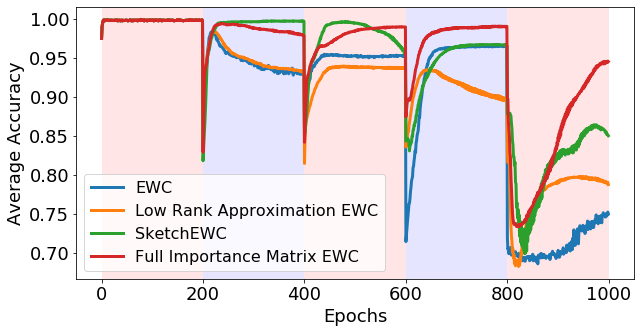

In [15]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
plt.plot(get_mean_acc(acc_ewc,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_low_rank_ewc,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_sketch_ewc,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_full_ewc,epochs),linewidth=3)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['EWC', 'Low Rank Approximation EWC', 'SketchEWC', 'Full Importance Matrix EWC'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
plt.savefig("figure/toy_ewc_accuracy.pdf", bbox_inches='tight')
plt.show()

In [17]:
print(get_mean_acc(acc_ewc,epochs)[-1],
      get_mean_acc(acc_low_rank_ewc,epochs)[-1],
      get_mean_acc(acc_sketch_ewc,epochs)[-1],
      get_mean_acc(acc_full_ewc,epochs)[-1])

0.7495 0.7873000000000001 0.8498000000000001 0.9449


## Toy Example MAS Accuracy

In [18]:
acc_mas_list = []
acc_low_rank_mas_list = []
acc_sketch_mas_list = []
acc_full_mas_list = []
for i in range(5):
    path_mas = './toy_example/toy_example_mas_id_%d.pkl'%(i)
    with open(path_mas, 'rb') as f:
        acc_mas, acc_low_rank_mas, acc_sketch_mas, acc_full_mas = pickle.load(f)
        acc_mas_list.append(acc_mas)
        acc_low_rank_mas_list.append(acc_low_rank_mas)
        acc_sketch_mas_list.append(acc_sketch_mas)
        acc_full_mas_list.append(acc_full_mas)

In [19]:
acc_mas = get_mean_acc_on_iterations(acc_mas_list)
acc_low_rank_mas = get_mean_acc_on_iterations(acc_low_rank_mas_list)
acc_sketch_mas = get_mean_acc_on_iterations(acc_sketch_mas_list)
acc_full_mas = get_mean_acc_on_iterations(acc_full_mas_list)

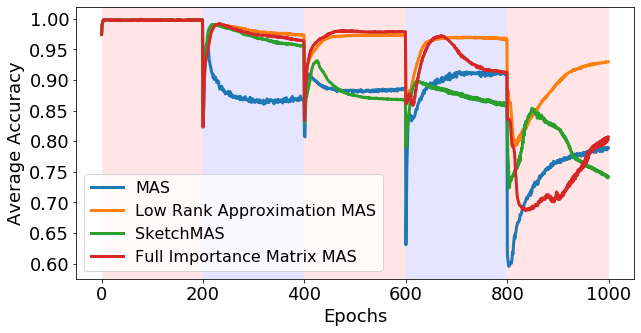

In [20]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
plt.plot(get_mean_acc(acc_mas,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_low_rank_mas,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_sketch_mas,epochs),linewidth=3)
plt.plot(get_mean_acc(acc_full_mas,epochs),linewidth=3)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['MAS', 'Low Rank Approximation MAS', 'SketchMAS', 'Full Importance Matrix MAS'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
plt.savefig("figure/toy_mas_accuracy.pdf", bbox_inches='tight')
plt.show()

In [21]:
print(get_mean_acc(acc_mas,epochs)[-1],
      get_mean_acc(acc_low_rank_mas,epochs)[-1],
      get_mean_acc(acc_sketch_mas,epochs)[-1],
      get_mean_acc(acc_full_mas,epochs)[-1])

0.7893 0.9297000000000001 0.7421 0.8069
